<a href="https://colab.research.google.com/github/ryu45-hu/SubmissionBMLP/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Akhmad_Mustolih.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


**Data bank_transactions_data_2.csv berisi 2.512 transaksi perbankan dengan 16 kolom informasi. Berikut ringkasan isi datanya:**

* TransactionID, AccountID: Identitas unik untuk transaksi dan akun.

* TransactionAmount: Jumlah uang dalam transaksi.

* TransactionDate, PreviousTransactionDate: Tanggal dan waktu transaksi sekarang dan sebelumnya.

* TransactionType: Jenis transaksi seperti Debit atau Credit.

* Location, DeviceID, IP Address, MerchantID: Informasi lokasi dan perangkat transaksi.

* Channel: Media transaksi seperti ATM atau Online.

* CustomerAge, CustomerOccupation: Usia dan pekerjaan nasabah.

* TransactionDuration: Durasi transaksi (dalam detik).

* LoginAttempts: Jumlah upaya login sebelum transaksi.

* AccountBalance: Saldo rekening setelah transaksi.



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [11]:
bank_df=pd.read_csv("/content/drive/MyDrive/DBS CODING/dataset_clustering.csv")
bank_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [12]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [13]:
# Ubah Tipe Data TransactionDate & PreviousTransactionDate menjadi datetime
bank_df['TransactionDate'] = pd.to_datetime(bank_df['TransactionDate'])
bank_df['PreviousTransactionDate'] = pd.to_datetime(bank_df['PreviousTransactionDate'])

# Menghapus Kolom yang Tidak Relevan
bank_df =bank_df.drop(["TransactionID", "AccountID", "DeviceID", "IP Address", "MerchantID"], axis=1)

bank_df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [14]:
bank_df.describe()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512.000000,2512
mean,297.593778,2023-07-05 20:32:10.826433024,44.673965,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,81.885000,2023-04-03 16:22:05.750000128,27.000000,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,211.140000,2023-07-07 17:49:43.500000,45.000000,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,414.527500,2023-10-06 18:40:53.500000,59.000000,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,2024-11-04 08:12:23
std,291.946243,NaN,17.792198,69.963757,0.602662,3900.942499,NaN


In [15]:
# Melihat Missing Values
missing_value =bank_df.isnull().sum()
missing_value

,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


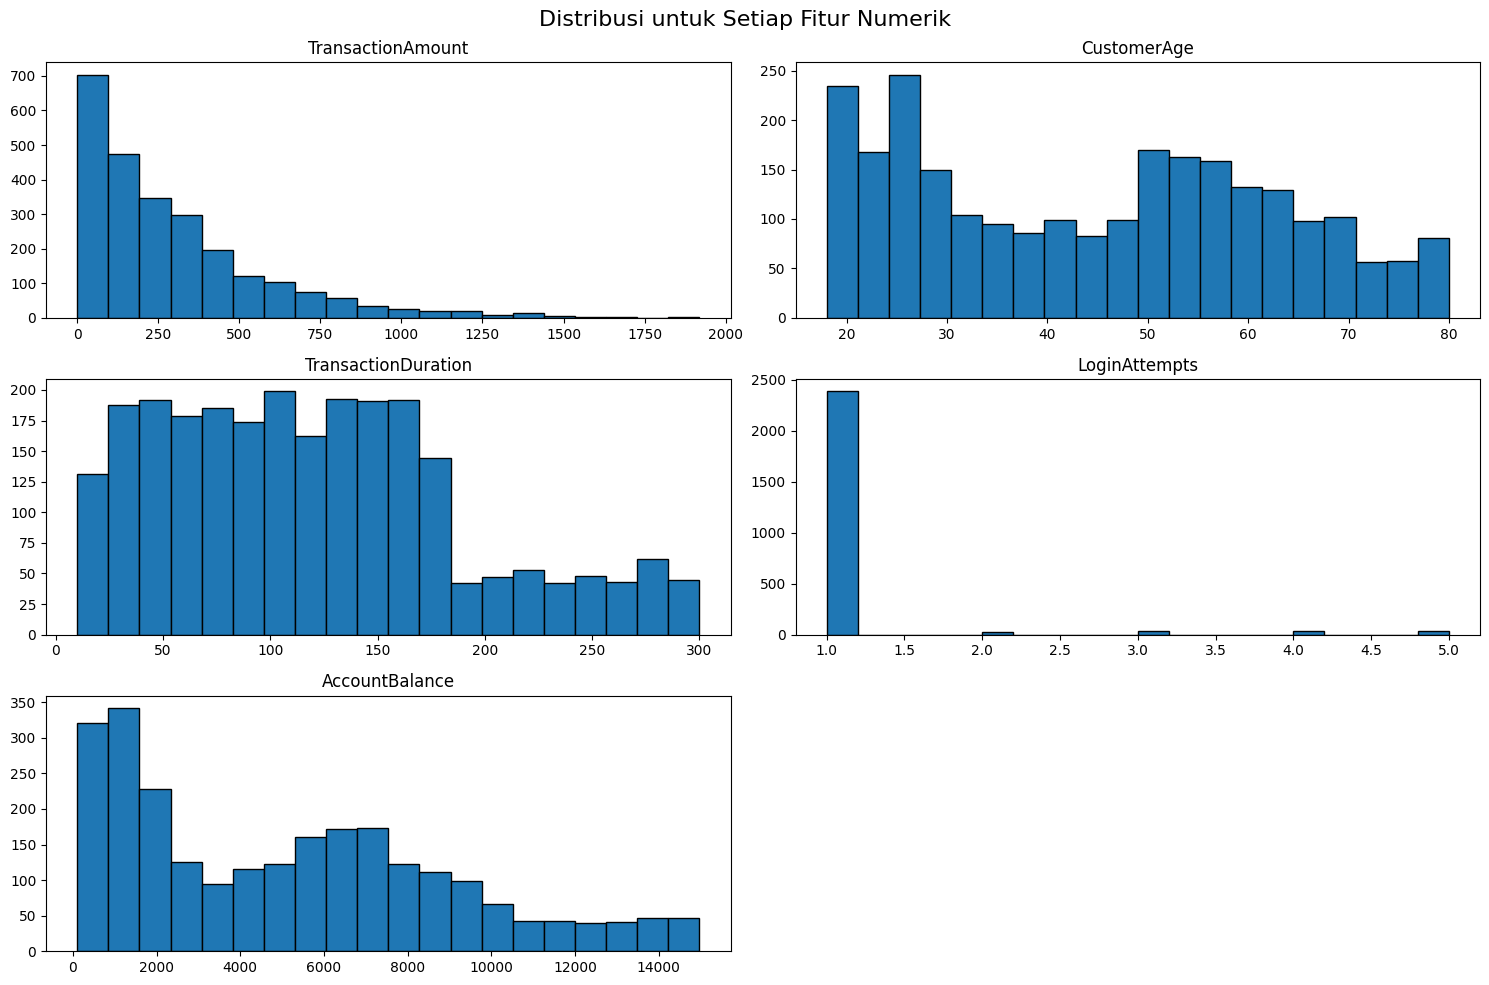

In [16]:
# Melihat distribusi fitur
bank_df.select_dtypes(include="number").hist(bins=20, figsize=(15, 10), grid=False, edgecolor="black")
plt.suptitle("Distribusi untuk Setiap Fitur Numerik", fontsize=16)
plt.tight_layout()
plt.show()

In [17]:
# Melihat korelasi antar fitur
numerik_df = bank_df.select_dtypes(include="number")
numerik_df.corr()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.025616,0.004359,-0.008445,-0.025165
CustomerAge,-0.025616,1.000000,-0.017936,0.007653,0.319942
TransactionDuration,0.004359,-0.017936,1.000000,0.032639,0.005577
LoginAttempts,-0.008445,0.007653,0.032639,1.000000,0.014999
AccountBalance,-0.025165,0.319942,0.005577,0.014999,1.000000


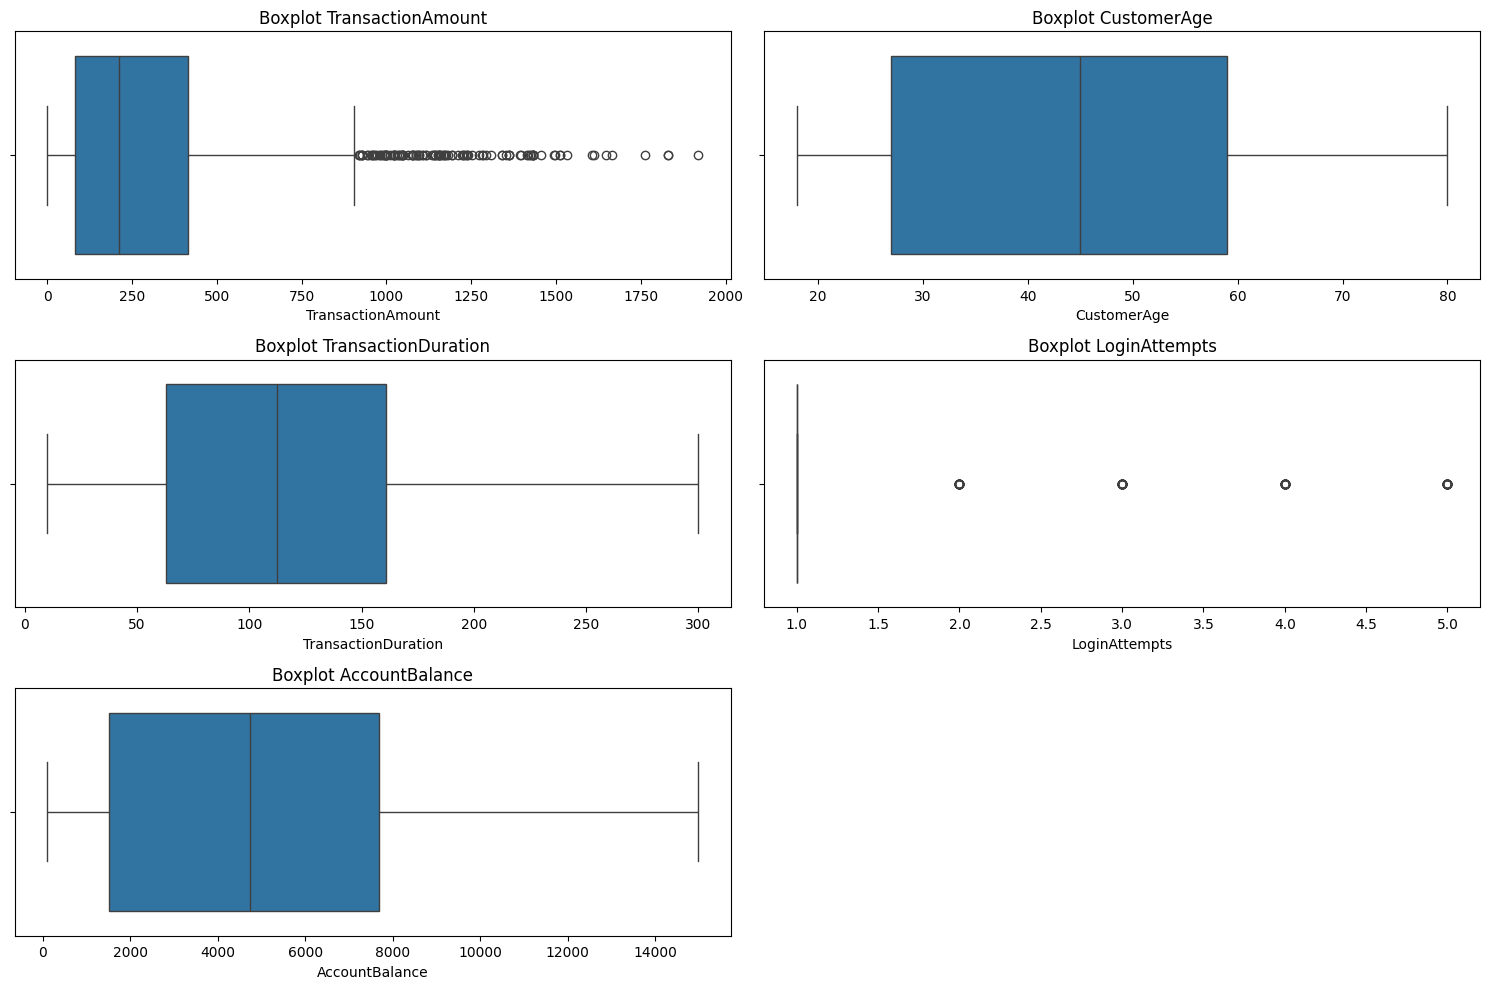

In [18]:
# Visualisasi Data Numerik dengan Boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerik_df, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=bank_df[col])
    plt.title(f"Boxplot {col}")

plt.tight_layout()
plt.show()

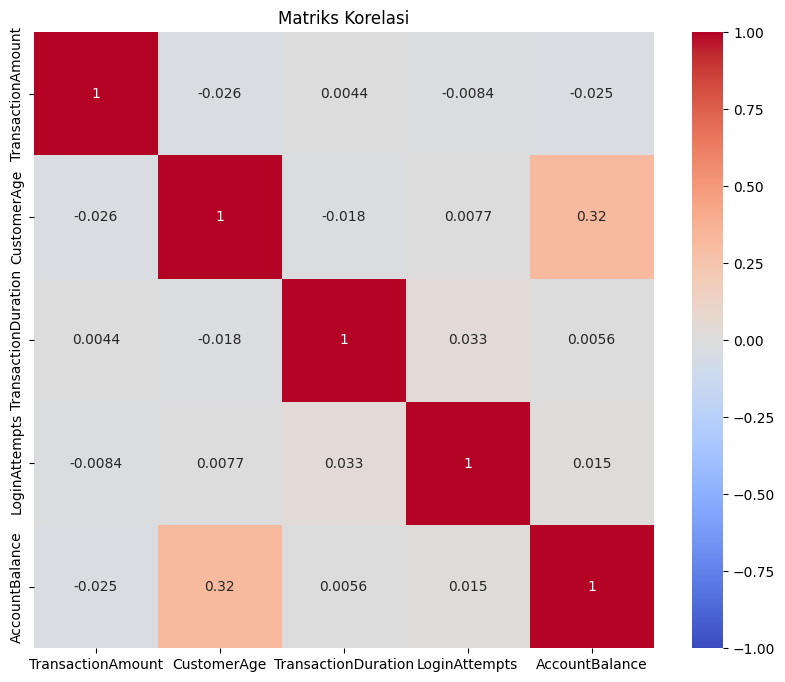

In [19]:
# Heatmap korelasi antar fitur
plt.figure(figsize=(10, 8))
# Changed from bank_df[numerik_df].corr() to numerik_df.corr()
sns.heatmap(numerik_df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("Matriks Korelasi")
plt.show()

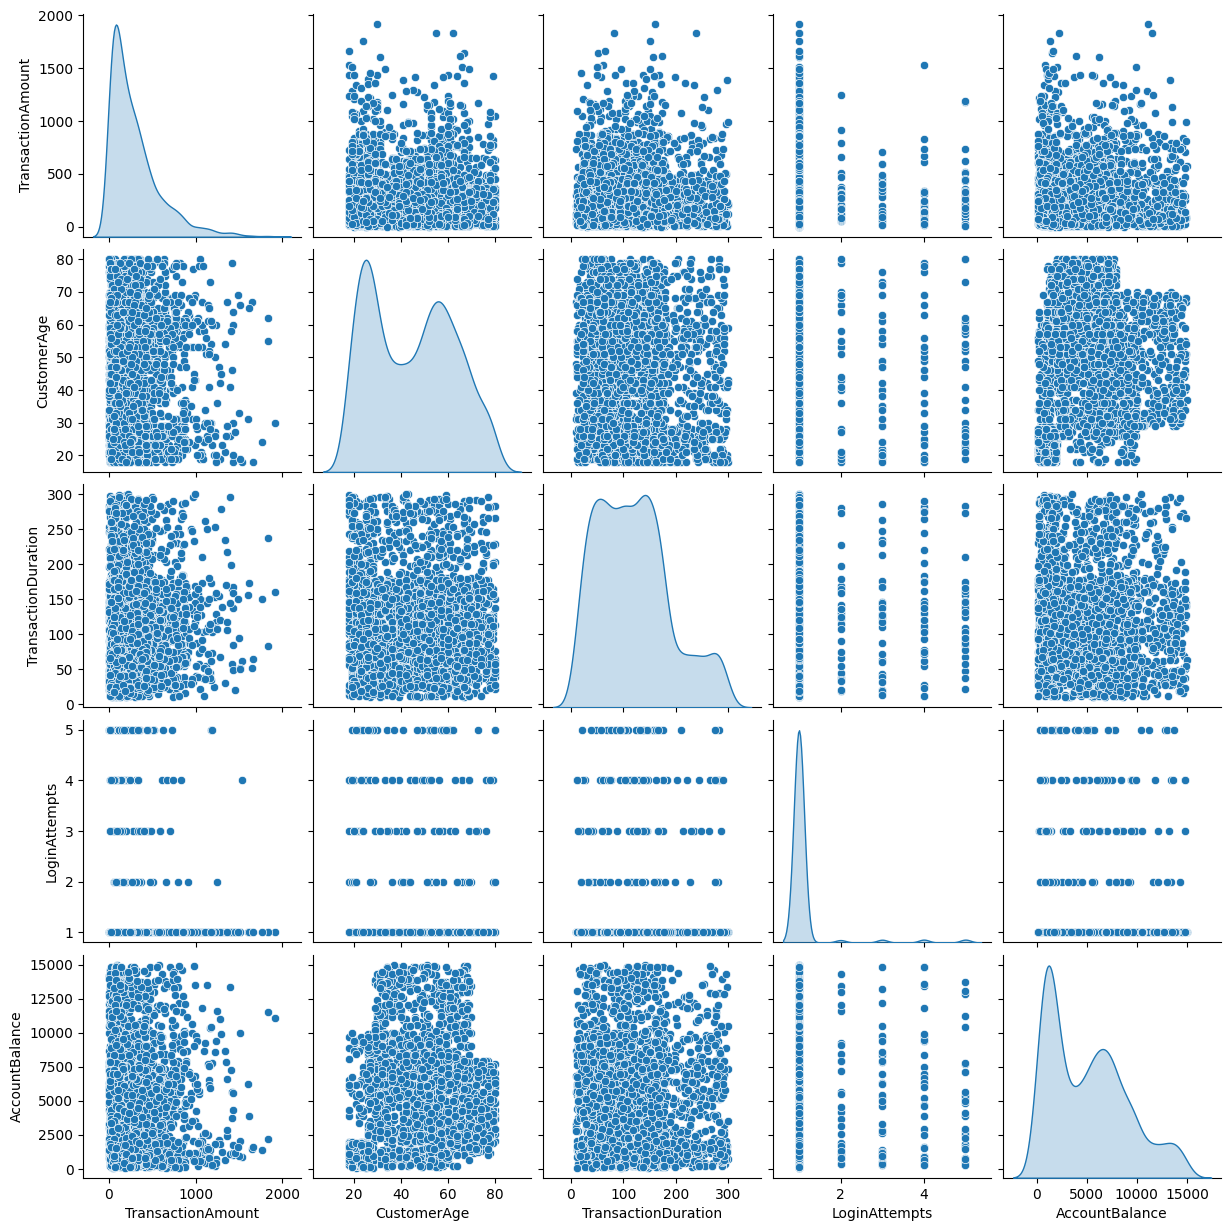

In [20]:
# Visualisasi dengan Pairplot
sns.pairplot(numerik_df, diag_kind="kde")
plt.show()

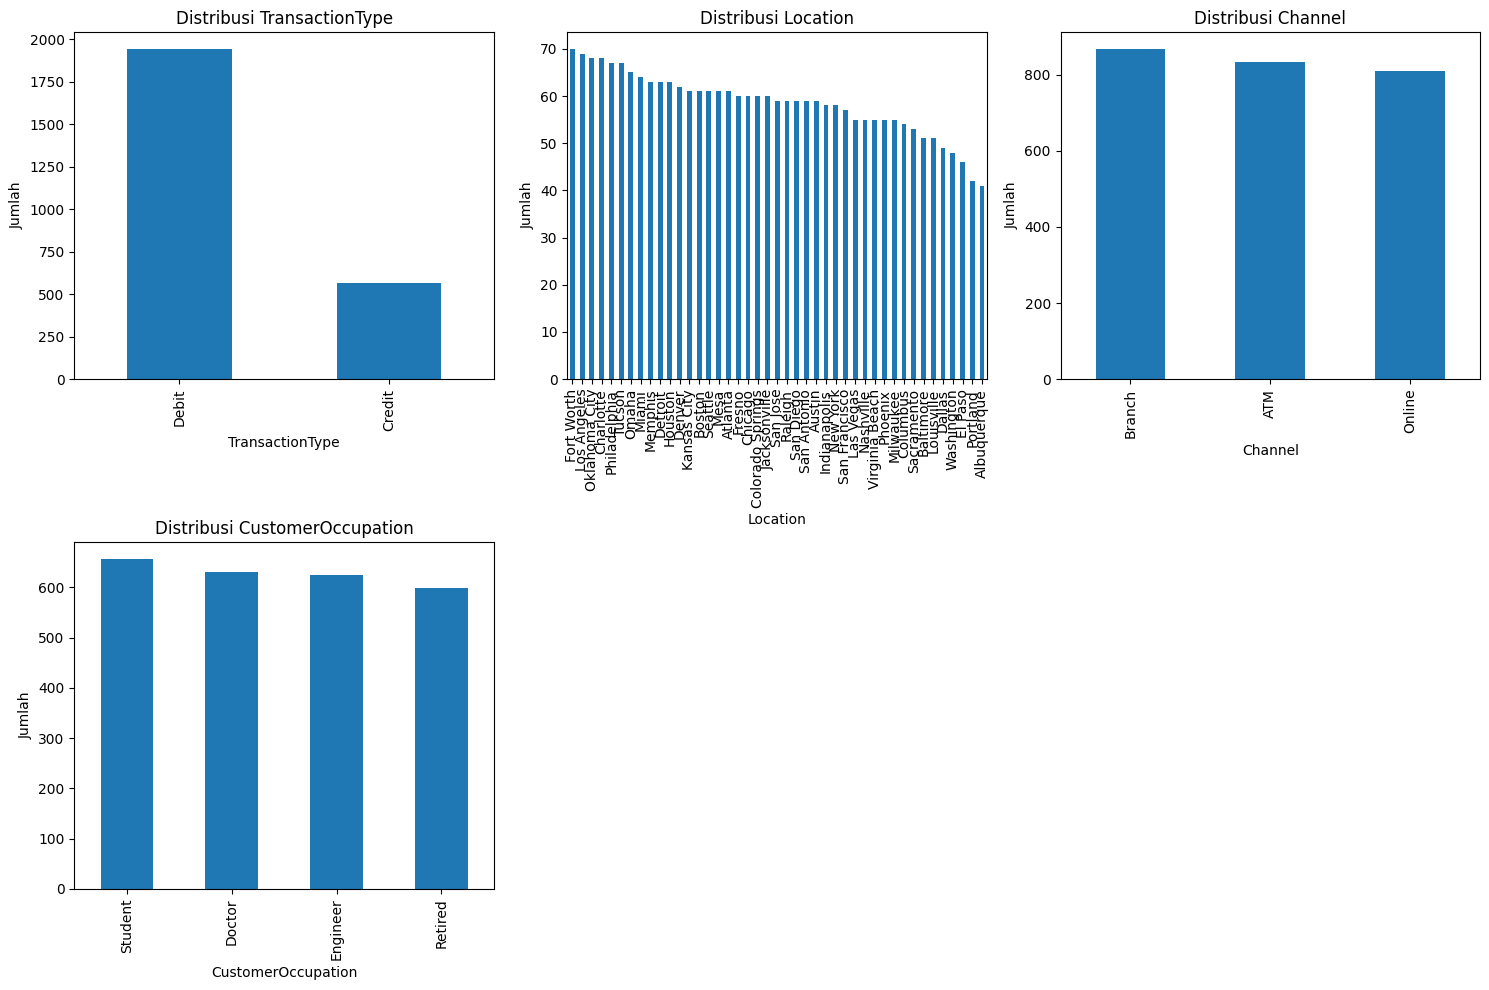

In [21]:
# Visualisasi Data Categorial
kategori_df = bank_df.select_dtypes(include=["object"]).columns

# Calculate the number of rows and columns for subplots
num_cols = 3  # Number of columns
num_rows = int(np.ceil(len(kategori_df) / num_cols))  # Calculate number of rows

plt.figure(figsize=(15, 10))
for i, col in enumerate(kategori_df, 1):
    # Create subplot, ensuring index is within range
    plt.subplot(num_rows, num_cols, i)
    bank_df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

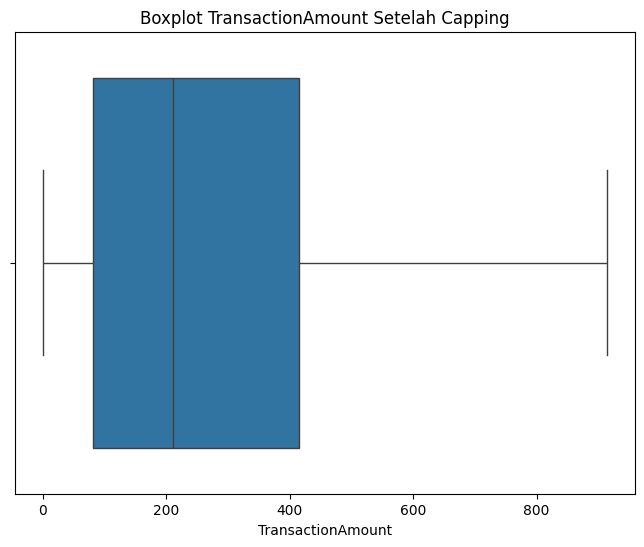

In [22]:
# Capping Data Outlier
def cap_outliers(bank_df, column):
    Q1 = bank_df[column].quantile(0.25)
    Q3 = bank_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR

    upper_bound = Q3 + 1.5 * IQR
    bank_df[column] = np.where(bank_df[column] < lower_bound, lower_bound, bank_df[column])
    bank_df[column] = np.where(bank_df[column] > upper_bound, upper_bound, bank_df[column])

    return bank_df

bank_df = cap_outliers(bank_df, "TransactionAmount")

# Tampilkan Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=bank_df["TransactionAmount"])
plt.title("Boxplot TransactionAmount Setelah Capping")
plt.show()

In [23]:
# Menambahkan Fitur
# 1. Basic time feature
bank_df["Hour"] = bank_df["TransactionDate"].dt.hour

# 2. Simple transaction features
bank_df["AmountToBalanceRatio"] = bank_df["TransactionAmount"] / (
    bank_df["AccountBalance"] + 1)

# Adding 1 to avoid division by zero
bank_df["TransactionEfficiency"] = bank_df["TransactionAmount"] / (bank_df["TransactionDuration"] + 1)


In [24]:
# 2. Mengambil kolom relevan untuk analisis
features = [
    "TransactionAmount",
    "AccountBalance",
    "TransactionDuration",
    "Hour",
    "AmountToBalanceRatio",
    "TransactionEfficiency",
    ]

X = bank_df[features]
X.head()

,TransactionAmount,AccountBalance,TransactionDuration,Hour,AmountToBalanceRatio,TransactionEfficiency
0,14.09,5112.21,81,16,0.002756,0.171829
1,376.24,13758.91,141,16,0.027343,2.649577
2,126.29,1122.35,56,18,0.112423,2.215614
3,184.50,8569.06,25,16,0.021528,7.096154
4,13.45,7429.40,198,17,0.001810,0.067588


In [25]:
# Standarisasi Nilai dengan RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,TransactionAmount,AccountBalance,TransactionDuration,Hour,AmountToBalanceRatio,TransactionEfficiency
0,-0.592378,0.061009,-0.321429,0.0,-0.384483,-0.457185
1,0.496329,1.461410,0.290816,0.0,-0.191986,0.184160
2,-0.255079,-0.585179,-0.576531,2.0,0.474102,0.071832
3,-0.080086,0.620873,-0.892857,0.0,-0.237510,1.335122
4,-0.594302,0.436296,0.872449,1.0,-0.391885,-0.484168


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

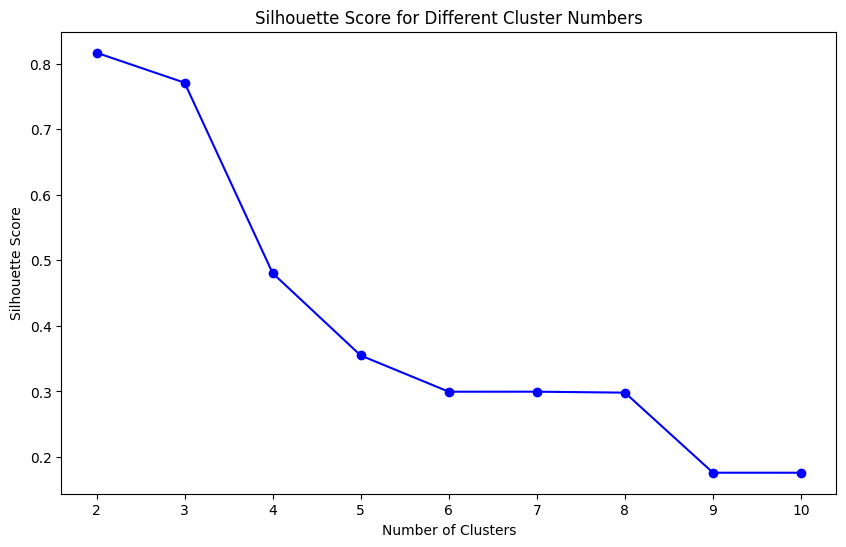

In [26]:
# Mencari cluster dengan Silhouette Score terbaik (> 0.7)

cluster_numbers = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_numbers:
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(cluster_numbers, silhouette_scores, "bo-")
plt.title("Silhouette Score for Different Cluster Numbers")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [27]:
model = AgglomerativeClustering(n_clusters=3)
labels = model.fit_predict(X_scaled)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [28]:
# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg:.3f}" )

Silhouette Score: 0.771


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [29]:
# Korelasi fitur pace
# Feature Extraction dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Modeling dengan X_pca
clustering_with_pca = AgglomerativeClustering(n_clusters=3)
labels_with_pca = clustering_with_pca.fit_predict(X_pca)

# Silhouette Score
silhouette_avg_selected = silhouette_score(X_pca, labels_with_pca)
print(f"Silhouette Score: {silhouette_avg_selected:.3f}" )

Silhouette Score: 0.777


In [30]:
print(f"Silhouette Score (sebelum feature selection): {silhouette_avg:.3f}")
print(f"Silhouette Score (setelah feature selection): {silhouette_avg_selected:.3f}")

Silhouette Score (sebelum feature selection): 0.771
Silhouette Score (setelah feature selection): 0.777


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

<ipython-input-31-0a482c9bb36b>:5: RuntimeWarning: Mean of empty slice.
  centroid = cluster_points.mean(axis=0)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


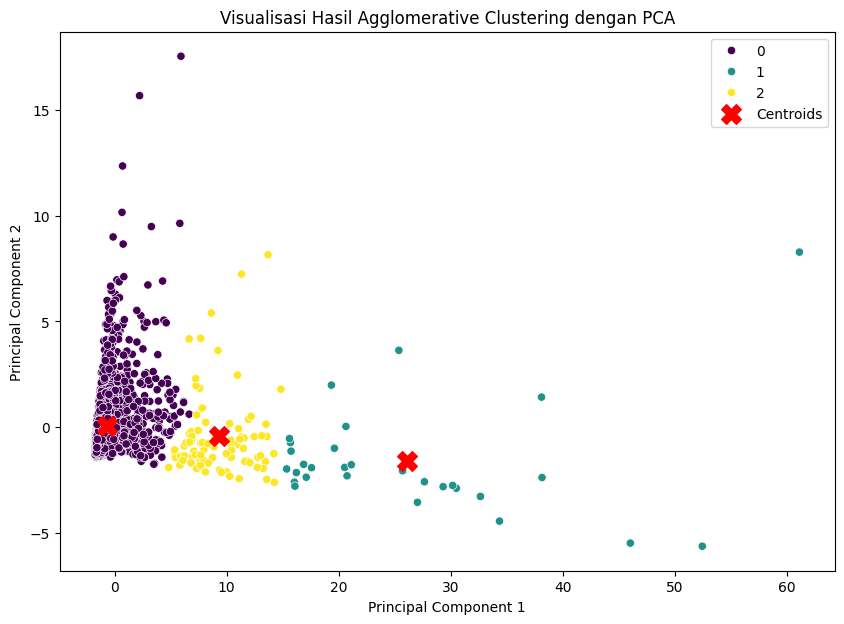

In [31]:
# Hitung centroid
centroids = []
for cluster in range(n_clusters):
    cluster_points = X_pca[labels_with_pca == cluster]
    centroid = cluster_points.mean(axis=0)
    centroids.append(centroid)

centroids = np.array(centroids)

# Plot scatter plot dengan centroid
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_with_pca, palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('Visualisasi Hasil Agglomerative Clustering dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [32]:
# Menambahkan Label ke DataFrame yang Dinormalisasi
X_scaled['Cluster'] = labels

# Inverse Transform Label yang Dinormalisasi
features_to_inverse = ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 'Hour', 'AmountToBalanceRatio', 'TransactionEfficiency']
X_scaled[features_to_inverse] = scaler.inverse_transform(X_scaled[features_to_inverse])

# Tambahkan Data yang sudah Diinverse ke dalam DataFrame Asli
bank_df[features_to_inverse + ['Cluster']] = X_scaled[features_to_inverse + ['Cluster']]

bank_df

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Hour,AmountToBalanceRatio,TransactionEfficiency,Cluster
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70,Doctor,81.0,1,5112.21,2024-11-04 08:08:08,16.0,0.002756,0.171829,0
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68,Doctor,141.0,1,13758.91,2024-11-04 08:09:35,16.0,0.027343,2.649577,0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19,Student,56.0,1,1122.35,2024-11-04 08:07:04,18.0,0.112423,2.215614,0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26,Student,25.0,1,8569.06,2024-11-04 08:09:06,16.0,0.021528,7.096154,0
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,26,Student,198.0,1,7429.40,2024-11-04 08:06:39,17.0,0.001810,0.067588,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,Branch,33,Doctor,109.0,1,12690.79,2024-11-04 08:11:29,17.0,0.067462,7.783727,0
2508,251.54,2023-03-22 17:36:48,Debit,Tucson,Branch,48,Doctor,177.0,1,254.75,2024-11-04 08:11:42,17.0,0.983539,1.413146,0
2509,28.63,2023-08-21 17:08:50,Debit,San Diego,Branch,56,Retired,146.0,1,3382.91,2024-11-04 08:08:39,17.0,0.008461,0.194762,0
2510,185.97,2023-02-24 16:24:46,Debit,Denver,Online,23,Student,19.0,1,1776.91,2024-11-04 08:12:22,16.0,0.104600,9.298500,0


### Agregasi Data

In [33]:
# Fitur yang diinterpretasi
features_to_interpret = {
    'numeric': ['TransactionAmount', 'AccountBalance', 'AmountToBalanceRatio'],
    'categorical': ['Channel', 'TransactionType']
}

# Loop melalui setiap cluster
print("# Interpretasi hasil clustering")
for cluster_id in bank_df['Cluster'].unique():
    print(f"\nInterpretasi Cluster {cluster_id}:")
    cluster_data = bank_df[bank_df['Cluster'] == cluster_id]

    # Interpretasi fitur numerik
    for feature in features_to_interpret['numeric']:
        avg_value = cluster_data[feature].mean()
        print(f"- Rata-rata {feature}: {avg_value:.2f}")

    # Interpretasi fitur kategorikal
    for feature in features_to_interpret['categorical']:
        dominant_value = cluster_data[feature].mode()[0]
        print(f"- {feature} dominan: {dominant_value}")

# Interpretasi hasil clustering

Interpretasi Cluster 0:
- Rata-rata TransactionAmount: 274.37
- Rata-rata AccountBalance: 5258.04
- Rata-rata AmountToBalanceRatio: 0.13
- Channel dominan: Branch
- TransactionType dominan: Debit

Interpretasi Cluster 1:
- Rata-rata TransactionAmount: 740.80
- Rata-rata AccountBalance: 159.80
- Rata-rata AmountToBalanceRatio: 4.84
- Channel dominan: Online
- TransactionType dominan: Debit

Interpretasi Cluster 2:
- Rata-rata TransactionAmount: 611.98
- Rata-rata AccountBalance: 344.97
- Rata-rata AmountToBalanceRatio: 1.88
- Channel dominan: Online
- TransactionType dominan: Debit


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

# Analisis Karakteristik Cluster dari Model Agglomerative Clustering

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model Agglomerative Clustering.

## Cluster 1:
- **Rata-rata TransactionAmount :** 274.37
- **Rata-rata AccountBalance:** 5258.04
- **Rata-rata AmountToBalanceRatio:** 0.13
- **Channel dominan:** Branch
- **TransactionType dominan:** Debit
- **Analisis:** Klaster ini terdiri dari nasabah yang memiliki saldo besar namun frekuensi transaksi yang relatif rendah. Mereka lebih sering melakukan transaksi bernominal kecil melalui kantor cabang, mencerminkan kecenderungan terhadap layanan perbankan tradisional. Nasabah dalam klaster ini umumnya tidak terlalu aktif bertransaksi dan tampak lebih memilih untuk menyimpan dana daripada menggunakannya.

## Cluster 2:
- **Rata-rata TransactionAmount :** 740.80
- **Rata-rata AccountBalance:** 159.80
- **Rata-rata AmountToBalanceRatio:** 4.84
- **Channel dominan:** Online
- **TransactionType dominan:** Debit
- **Analisis:** Klaster ini merepresentasikan nasabah yang sangat aktif dalam melakukan transaksi digital dengan nominal yang cukup besar, meskipun saldo rekening mereka tergolong rendah. Kelompok ini menunjukkan preferensi yang kuat terhadap layanan perbankan online dan kerap melakukan transaksi bernilai tinggi dibandingkan dengan saldo yang dimiliki.

## Cluster 3:
- **Rata-rata TransactionAmount :** 611.98
- **Rata-rata AccountBalance:** 344.97
- **Rata-rata AmountToBalanceRatio:** 1.88
- **Channel dominan:** Online
- **TransactionType dominan:** Debit
- **Analisis:** Klaster ini mencakup nasabah yang cukup aktif bertransaksi secara online dengan nominal sedang, serta memiliki saldo rekening yang relatif rendah, meskipun lebih tinggi dibandingkan Klaster 1. Mereka cenderung nyaman memanfaatkan layanan digital untuk berbagai transaksi, namun dengan nilai yang lebih moderat dibandingkan nasabah di Klaster 1.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [35]:
bank_df.to_csv("dataset_klasifikasi.csv")